In [51]:
from pandas import DataFrame, Series
import pandas as pd

synopsis_raw = pd.read_csv('goodreads synopsis.csv')
synopsis_raw = synopsis_raw.drop(columns = ['web-scraper-order', 'Book-href', 'next', 'next-href', 'web-scraper-start-url', 'Book Name'])
synopsis_raw.head()

,Book,Author,Rating,Genre 1,Number Ratings,Number Reviews,Genre 2,Genre 3,Synopsis - Main
0,El lado bueno de las cosas,Matthew Quick,4.00,Fiction,"142,416\n ratings","11,715\n reviews",Contemporary,Health,"Os presentamos a Pat Peoples, sufre de amnesia..."
1,The Third Man,Graham Greene,3.83,Fiction,"11,037\n ratings",644\n reviews,Mystery,Thriller,Rollo Martins' usual line is the writing of ch...
2,Shane,Jack Schaefer,3.85,Westerns,"9,262\n ratings",750\n reviews,Fiction,Historical,A stranger rode out of the heart of the great ...
3,The Bridges of Madison County,Robert James Waller,3.60,Fiction,"73,221\n ratings","4,052\n reviews",Romance,Womens Fiction,"The story of Robert Kincaid, the photographer ..."
4,Same Time Next Year,Bernard Slade,3.91,Plays,403\n ratings,17\n reviews,Drama,Humor,"Full Length, ComedyCharacters: 1 male, 1 femal..."


In [52]:
print(synopsis_raw['Synopsis - Main'][0])

Os presentamos a Pat Peoples, sufre de amnesia y ha desarrollado una teoría muy peculiar según la cual su vida es una película producida por Dios. Y la misión que le ha dado Dios es ponerse en forma y convertirse en un buen tipo para recuperar a su ex esposa. Bueno, Pat es un poco disfuncional y, por esta razón, ha pasado algunos años en un centro de salud mental.
Ahora ha
  Os presentamos a Pat Peoples, sufre de amnesia y ha desarrollado una teoría muy peculiar según la cual su vida es una película producida por Dios. Y la misión que le ha dado Dios es ponerse en forma y convertirse en un buen tipo para recuperar a su ex esposa. Bueno, Pat es un poco disfuncional y, por esta razón, ha pasado algunos años en un centro de salud mental.
Ahora ha regresado al hogar familiar y allí, con la ayuda de su madre (una sufrida mujer que acaba por declararse en huelga de cocina y limpieza), su padre (un hombre gruñón que no tiene otra manera de relacionarse con su hijo que viendo deportes por la t

As we can see above, the scrapper gives the synopsis weirdly. Since most synopsis' have a more button to show the full text on clicking. So the synopsis gives us part of the review twice. The next piece of code is to fix that.

In [53]:
for i in range(len(synopsis_raw)):
    synopsis = synopsis_raw['Synopsis - Main'][i]
    if type(synopsis) == str and '  ...more' in synopsis:
        synopsis_raw.at[i, 'Synopsis'] = synopsis.split('  ')[1] #cleaning the book synopsis
    elif type(synopsis) != str:
        synopsis_raw.at[i, 'Synopsis'] = 'None'
    else:
        synopsis_raw.at[i, 'Synopsis'] = synopsis
    #Converting the number of reviews and ratings from strings to int
    synopsis_raw.at[i, 'Number Ratings'] = int(synopsis_raw['Number Ratings'][i].split('\n')[0].replace(',',''))
    synopsis_raw.at[i, 'Number Reviews'] = int(synopsis_raw['Number Reviews'][i].split('\n')[0].replace(',',''))
synopsis_raw.head()

,Book,Author,Rating,Genre 1,Number Ratings,Number Reviews,Genre 2,Genre 3,Synopsis - Main,Synopsis
0,El lado bueno de las cosas,Matthew Quick,4.00,Fiction,142416,11715,Contemporary,Health,"Os presentamos a Pat Peoples, sufre de amnesia...","Os presentamos a Pat Peoples, sufre de amnesia..."
1,The Third Man,Graham Greene,3.83,Fiction,11037,644,Mystery,Thriller,Rollo Martins' usual line is the writing of ch...,Rollo Martins' usual line is the writing of ch...
2,Shane,Jack Schaefer,3.85,Westerns,9262,750,Fiction,Historical,A stranger rode out of the heart of the great ...,A stranger rode out of the heart of the great ...
3,The Bridges of Madison County,Robert James Waller,3.60,Fiction,73221,4052,Romance,Womens Fiction,"The story of Robert Kincaid, the photographer ...","The story of Robert Kincaid, the photographer ..."
4,Same Time Next Year,Bernard Slade,3.91,Plays,403,17,Drama,Humor,"Full Length, ComedyCharacters: 1 male, 1 femal...","Full Length, ComedyCharacters: 1 male, 1 femal..."


In [54]:
reviews = pd.read_csv('goodreads-reviews.csv')
reviews = reviews.drop(columns = ['web-scraper-order', 'web-scraper-start-url', 'book-href'])
reviews.head()

,rating,date,review text,book
0,did not like it,"Sep 08, 2007","This book is like a preface, where the real bo...",The Virgin Suicides
1,really liked it,"Jan 23, 2008",This review has been hidden because it contain...,The Cider House Rules
2,it was amazing,"Jun 17, 2017","Parker, no first name, no last name. Shot five...","The Hunter (Parker, #1)"
3,it was ok,"Jan 31, 2015",I am aware how this doorstop from the past is ...,The Count of Monte Cristo
4,liked it,"Oct 24, 2017",a fascinating novel tacking the subject of an ...,Awakenings


In [55]:
reviews['rating'].value_counts()

it was amazing     65328
really liked it    59233
liked it           31962
it was ok          12750
did not like it     7522
Name: rating, dtype: int64

In [56]:
rating_dict = {'it was amazing' : 5, 'really liked it' : 4, 'liked it' : 3, 'it was ok' : 2, 'did not like it' : 1, 'nan' : 0}

In [57]:
reviews['review text'][1].split('  ')
for i in range(len(reviews)):
    review = reviews['review text'][i]
    if type(review) == str and 'This review has been hidden because it contains spoilers. To view it,\n                    click here.\n                  \n              \n            \n' in review:
        reviews.at[i, 'review'] = review.split('This review has been hidden because it contains spoilers. To view it,\n                    click here.\n                  \n              \n            \n')[1] #cleaning the book synopsis
    elif type(review) != str:
        continue
    elif '  ...more' in review:
        reviews.at[i, 'review'] = review.split('  ')[1]
    else:
        reviews.at[i, 'review'] = review
    
    rating = reviews['rating'][i]
    if type(rating) == str:
        reviews.at[i, 'rating_number'] = rating_dict[reviews['rating'][i]]
    else:
        reviews.at[i, 'rating_number'] = 0

reviews.head()

,rating,date,review text,book,review,rating_number
0,did not like it,"Sep 08, 2007","This book is like a preface, where the real bo...",The Virgin Suicides,"This book is like a preface, where the real bo...",1.0
1,really liked it,"Jan 23, 2008",This review has been hidden because it contain...,The Cider House Rules,I was actually really surprised at how much I ...,4.0
2,it was amazing,"Jun 17, 2017","Parker, no first name, no last name. Shot five...","The Hunter (Parker, #1)","Parker, no first name, no last name. Shot five...",5.0
3,it was ok,"Jan 31, 2015",I am aware how this doorstop from the past is ...,The Count of Monte Cristo,I am aware how this doorstop from the past is...,2.0
4,liked it,"Oct 24, 2017",a fascinating novel tacking the subject of an ...,Awakenings,a fascinating novel tacking the subject of an ...,3.0


In [58]:
synopsis_raw.head()

,Book,Author,Rating,Genre 1,Number Ratings,Number Reviews,Genre 2,Genre 3,Synopsis - Main,Synopsis
0,El lado bueno de las cosas,Matthew Quick,4.00,Fiction,142416,11715,Contemporary,Health,"Os presentamos a Pat Peoples, sufre de amnesia...","Os presentamos a Pat Peoples, sufre de amnesia..."
1,The Third Man,Graham Greene,3.83,Fiction,11037,644,Mystery,Thriller,Rollo Martins' usual line is the writing of ch...,Rollo Martins' usual line is the writing of ch...
2,Shane,Jack Schaefer,3.85,Westerns,9262,750,Fiction,Historical,A stranger rode out of the heart of the great ...,A stranger rode out of the heart of the great ...
3,The Bridges of Madison County,Robert James Waller,3.60,Fiction,73221,4052,Romance,Womens Fiction,"The story of Robert Kincaid, the photographer ...","The story of Robert Kincaid, the photographer ..."
4,Same Time Next Year,Bernard Slade,3.91,Plays,403,17,Drama,Humor,"Full Length, ComedyCharacters: 1 male, 1 femal...","Full Length, ComedyCharacters: 1 male, 1 femal..."


In [59]:
# Load the regular expression library
import re
# Remove punctuation
synopsis_raw['Synopsis_preprocessed'] = synopsis_raw['Synopsis'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the synopsis to lowercase
synopsis_raw['Synopsis_preprocessed'] = synopsis_raw['Synopsis'].map(lambda x: x.lower())
# Print out the first rows of papers
synopsis_raw['Synopsis_preprocessed'].head()

0    os presentamos a pat peoples, sufre de amnesia...
1    rollo martins' usual line is the writing of ch...
2    a stranger rode out of the heart of the great ...
3    the story of robert kincaid, the photographer ...
4    full length, comedycharacters: 1 male, 1 femal...
Name: Synopsis_preprocessed, dtype: object

In [84]:
# nltk.download('stopwords')
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer 
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer()  
import pandas as pd
import pandas as pd
import nltk
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
import re
import string
from sklearn.model_selection import train_test_split
%pylab inline
plt.style.use('ggplot')

# stopwords = set(STOPWORDS)

clean = re.compile('[^a-z]+')

def clean_syn(words):
#     stop_words = set(STOPWORDS)
    words = str(words)
    words = words.lower()
    words = clean.sub(' ', words).strip()
    translator = str.maketrans('', '', string.punctuation)
    words = words.translate(translator)
#     lemmas = [lemmatizer.lemmatize(words, pos ='v')] 
    word_tokens = word_tokenize(words)    
    filtered_text = [word for word in word_tokens if word not in stopwords.words()]
    return filtered_text

synopsis_raw['CleanSynopsis'] = synopsis_raw['Synopsis_preprocessed'].apply(clean_syn)
synopsis_raw['CleanSynopsis'][10]

Populating the interactive namespace from numpy and matplotlib


KeyboardInterrupt: 

In [89]:
df = synopsis_raw
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer 
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer()  

clean = re.compile('[^a-z]+')

def clean_syn(words):
    stop_words = set(stopwords.words("english"))
    words = str(words)
    words = words.lower()
    words = clean.sub(' ', words).strip()
    translator = str.maketrans('', '', string.punctuation)
    words = words.translate(translator)
#     word_tokens = word_tokenize(words) 
    lemmas = [lemmatizer.lemmatize(word, pos ='v') for word in word_tokens]    
    filtered_text = [word for word in lemmas if word not in stop_words]
    return filtered_text

synopsis_raw['Synopsis_preprocessed'] = synopsis_raw['Synopsis_preprocessed'].apply(clean_syn)
df['CleanSynopsis'][10]

NameError: name 'word_tokens' is not defined

In [88]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(synopsis_raw['Synopsis_preprocessed'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

TypeError: sequence item 0: expected str instance, list found

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(stop_words='english')
count_data = count_vectorizer.fit_transform(synopsis_raw['Synopsis_preprocessed'])

In [27]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)
# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below
number_topics = 10
number_words = 40
# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(count_data)
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
love world life family story novel beautiful girl children cover choose year man just old young book edition night time tale brilliant house mother daughter boy away american la lives gone new best way years takes people country wife century

Topic #1:
novel world story new life man young john book lives powerful years american black great written power prize women like men age edition love published epic best place old classic family town valley modern small america time century fiction steinbeck

Topic #2:
novel story world harry time new life great man war dr young dark love family just fiction book year long set murder century beautiful ring film lives mabuse james little old author published bond woman lonesome winning dove night classic

Topic #3:
man love az world monroe life novel story like great begins les clark és day mary girl heart loved la des death notebook est son williams new woman young stay tale le et noah hogy olivier adventure famil

Populating the interactive namespace from numpy and matplotlib


['peace',
 'remote',
 'welsh',
 'village',
 'nestle',
 'comfortably',
 'shadow',
 'inhabitants',
 'reverently',
 'call',
 'mountain',
 'rudely',
 'shatterred',
 'arrival',
 'two',
 'english',
 'mapmakers',
 'temerity',
 'announce',
 'mountain',
 'merely',
 'hill',
 'geographical',
 'term',
 'difference',
 'twenty',
 'feet',
 'greater',
 'injustice',
 'villagers',
 'bear',
 'smart',
 'pride',
 'band',
 'together',
 'keep',
 'mapmakers',
 'occupy',
 'whilst',
 'set',
 'put',
 'situation',
 'right',
 'whatever',
 'take',
 'write',
 'direct',
 'christopher',
 'monger',
 'englishman',
 'go',
 'hill',
 'come',
 'mountain',
 'beautifully',
 'observe',
 'romantic',
 'comedy',
 'prove',
 'mind',
 'matter',
 'still',
 'powerful',
 'force',
 'change']

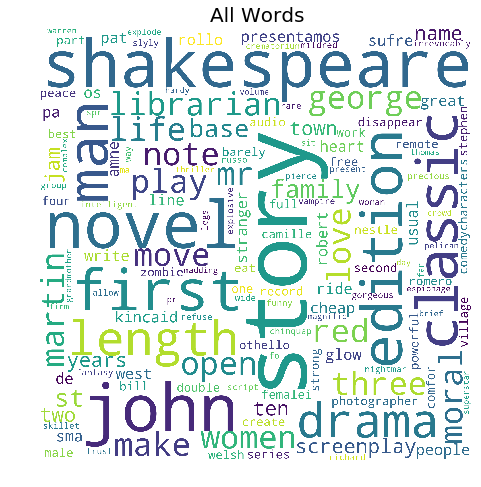

In [20]:
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)


def get_cloud(words, tit=None):
    wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords,
                max_words=200,
                scale=3,
                min_font_size=15,
                ).generate(str(words)) 
  
    # plot the WordCloud image                        
    plt.figure(1, figsize = (8, 8)) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    if tit:
        plt.title(tit, fontsize=20)
    plt.show() 
    
get_cloud(synopsis_raw['CleanSynopsis'], 'All Words')

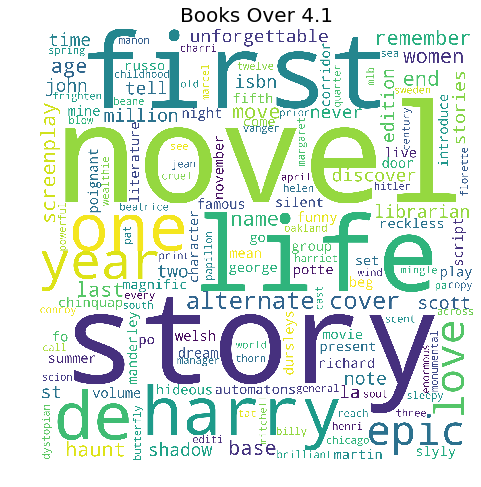

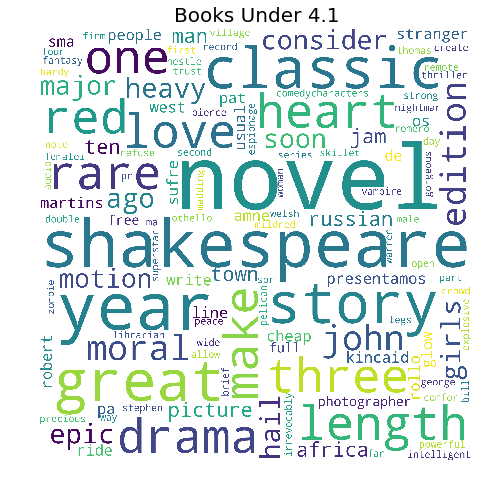

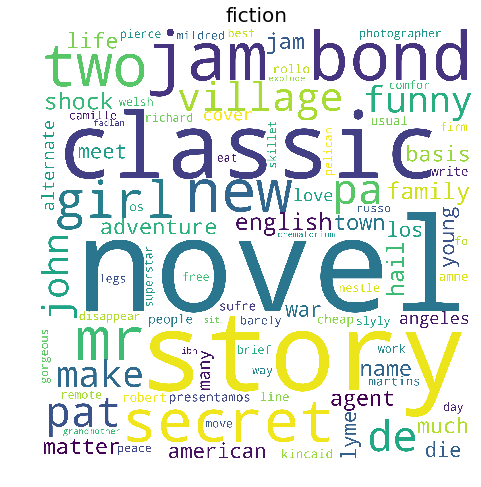

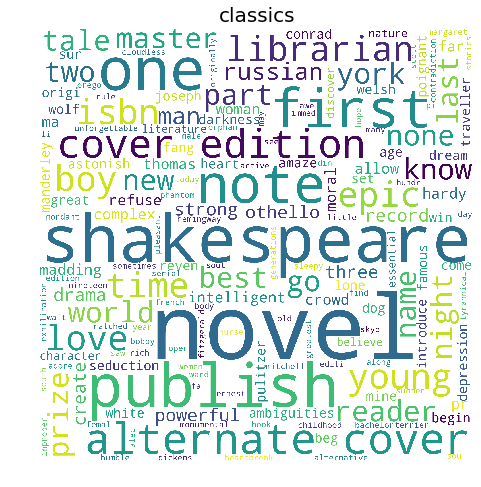

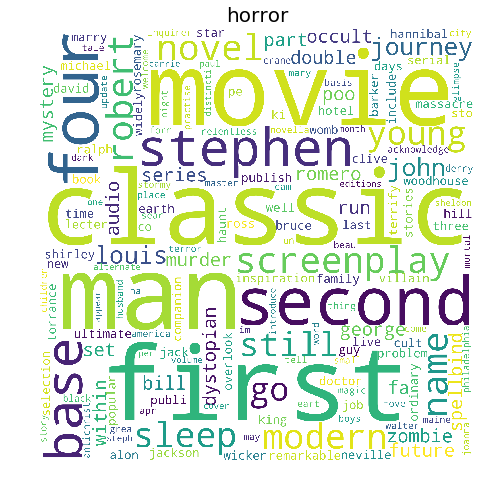

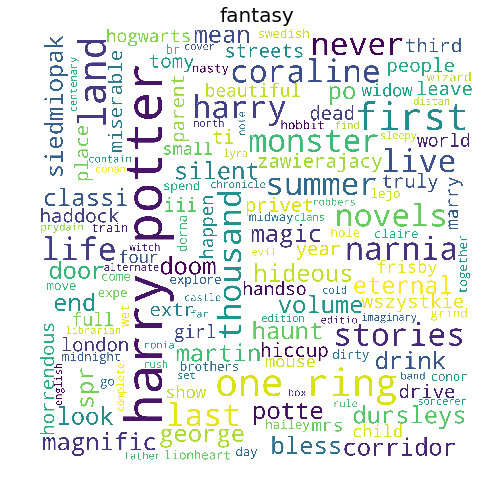

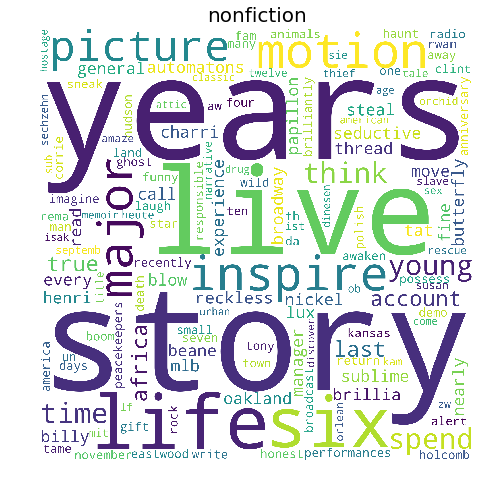

In [21]:
df = synopsis_raw
good_books = df[df['Rating'] > 4.1]
bad_books = df[df['Rating'] < 4.1]
fiction = df[df['Genre 1'] == 'Fiction']
classics = df[df['Genre 1'] == 'Classics']
horror = df[df['Genre 1'] == 'Horror']
fantasy = df[df['Genre 1'] == 'Fantasy']
nonfiction = df[df['Genre 1'] == 'Nonfiction']

category_list = [good_books, bad_books, fiction, classics, horror, fantasy, nonfiction]
category_titles = ['Books Over 4.1', 'Books Under 4.1', "fiction", 'classics', 'horror', 'fantasy', 'nonfiction']

# get_cloud(df['CleanSynopsis'], 'All Words')

def get_clouds(categories):
    count = 0 
    for cat in categories:
        get_cloud(cat['CleanSynopsis'], category_titles[count])
        count += 1
get_clouds(category_list)